In [1]:
import pandas as pd

In [2]:
#All datasets
dfa = pd.read_csv('tabla_nba.csv')
allstars = pd.read_csv('2017AllStarGame.csv',sep=';')
test = pd.read_csv('tabla_nba2.csv')
#2018
allstars2 = pd.read_csv('2018AllStarGame.csv',sep=';')
dfb = pd.read_csv('tabla_nba3.csv')
#2016
allstars3 = pd.read_csv('2016AllStarGame.csv',sep=';')

In [3]:
# Adding year feature
dfa['year']=2017
dfb['year']=2016

In [48]:
#Merge
df = pd.concat([dfa,dfb])

In [64]:
#Drop duplicated columns
asd = df.T.drop_duplicates(keep='first').T

In [5]:
#Drop duplicated columns (Manual)
df.drop(columns=["Team_x.1","Team_x.2",'Team_y',"Team_y.1","Team_y.2",'Games_x.1','Games_x.2','Games_y','Games_y.1','Games_y.2',
                 'MinutesxGame_x.1','MinutesxGame_x.2','MinutesxGame_y','MinutesxGame_y.1','MinutesxGame_y.2','Turnovers_y',
                'TurnoversxGame_y','PersonalFouls_y','Unnamed: 0','Ranking_x','Ranking_y','Ranking_y.1','Ranking_y.2',
                'Ranking_x.1','Ranking_x.2'],inplace=True)
test.drop(columns=["Team_x.1","Team_x.2",'Team_y',"Team_y.1","Team_y.2",'Games_x.1','Games_x.2','Games_y','Games_y.1','Games_y.2',
                 'MinutesxGame_x.1','MinutesxGame_x.2','MinutesxGame_y','MinutesxGame_y.1','MinutesxGame_y.2','Turnovers_y',
                'TurnoversxGame_y','PersonalFouls_y','Unnamed: 0','Ranking_x','Ranking_y','Ranking_y.1','Ranking_y.2',
                'Ranking_x.1','Ranking_x.2'],inplace=True)

In [7]:
#Generating a copy and more drops
df2 = df.copy()
df2.drop(columns=["Player","FieldGoalsxGame","3Pointers","FreeTrows"],inplace=True)
test2 = test.copy()
test2.drop(columns=["Player","FieldGoalsxGame","3Pointers","FreeTrows"],inplace=True)

In [9]:
#Split player name from player position.
divide = pd.DataFrame(df["Player"].str.split(',',expand=True))
divide.columns=["Player","Position"]

In [10]:
#Split fieldgoals in max and min. (previous format 'min-max')
divide2 = pd.DataFrame(df["FieldGoalsxGame"].str.split('-',expand=True))
divide2.columns=["FieldGoalsxGamemin","FieldGoalsxGamemax"]

In [11]:
#Same case as fieldgoals
divide3 = pd.DataFrame(df["3Pointers"].str.split('-',expand=True))
divide3.columns=["3Pointersmin","3Pointersmax"]

In [12]:
#Same case as fieldgoals
divide4 = pd.DataFrame(df["FreeTrows"].str.split('-',expand=True))
divide4.columns=["FreeTrowsmin","FreeTrowsmax"]

In [13]:
#Same process for the test data (could have merged and procecced them in one block)
dividet = pd.DataFrame(test["Player"].str.split(',',expand=True))
dividet.columns=["Player","Position"]
dividet2 = pd.DataFrame(test["FieldGoalsxGame"].str.split('-',expand=True))
dividet2.columns=["FieldGoalsxGamemin","FieldGoalsxGamemax"]
dividet3 = pd.DataFrame(test["3Pointers"].str.split('-',expand=True))
dividet3.columns=["3Pointersmin","3Pointersmax"]
dividet4 = pd.DataFrame(test["FreeTrows"].str.split('-',expand=True))
dividet4.columns=["FreeTrowsmin","FreeTrowsmax"]

In [14]:
#replacing values in dataframes
df2["Position"] = divide["Position"]
df2["Player"] = divide["Player"]
df2["FieldGoalsxGamemin"] = divide2["FieldGoalsxGamemin"].astype(float)
df2["FieldGoalsxGamemax"] = divide2["FieldGoalsxGamemax"].astype(float)
df2["3Pointersmin"] = divide3["3Pointersmin"].astype(float)
df2["3Pointersmax"] = divide3["3Pointersmax"].astype(float)
df2["FreeTrowsmin"] = divide4["FreeTrowsmin"].astype(float)
df2["FreeTrowsmax"] = divide4["FreeTrowsmax"].astype(float)

test2["Position"] = dividet["Position"]
test2["Player"] = dividet["Player"]
test2["FieldGoalsxGamemin"] = dividet2["FieldGoalsxGamemin"].astype(float)
test2["FieldGoalsxGamemax"] = dividet2["FieldGoalsxGamemax"].astype(float)
test2["3Pointersmin"] = dividet3["3Pointersmin"].astype(float)
test2["3Pointersmax"] = dividet3["3Pointersmax"].astype(float)
test2["FreeTrowsmin"] = dividet4["FreeTrowsmin"].astype(float)
test2["FreeTrowsmax"] = dividet4["FreeTrowsmax"].astype(float)

In [15]:
#Generating dummies and merges
z=pd.get_dummies(df2.Position)
z.drop(columns=[' SG'],inplace=True)
df2=df2.join(z)

z=pd.get_dummies(test2.Position)
z.drop(columns=[' SG'],inplace=True)
test2=test2.join(z)

test2[' G'] = 0

In [16]:
df2.head(2)

,Team_x,Games_x,MinutesxGame_x,PointsxGame,FieldGoalPercentage,3pointersPercentage,FTPercentage,OffensiveRebounds,OffensiveReboundsxGame,DefensiveRebounds,...,3Pointersmin,3Pointersmax,FreeTrowsmin,FreeTrowsmax,C,F,G,PF,PG,SF
0,OKC,81,34.6,31.6,0.425,0.343,0.845,137,1.7,727,...,2.5,7.2,8.8,10.4,0,0,0,0,1,0
0,OKC,81,34.6,31.6,0.425,0.343,0.845,137,1.7,727,...,2.5,7.2,8.8,10.4,0,0,0,0,1,0


In [17]:
#Target incorporation
df2['elegido'] = 0
test2['elegido'] = 0

In [18]:
df2.loc[(df2['year']==2016)&(df2['Player'].isin(allstars3['Player'])),'elegido']=1
df2.loc[(df2['year']==2017)&(df2['Player'].isin(allstars['Player'])),'elegido']=1
test2.loc[test2['Player'].isin(allstars2['Player']),'elegido']=1

MODEL

In [19]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [22]:
#Model Data
X = df2[df2.columns.drop(['elegido','Team_x','Position','Player','year'])]
y = df2['elegido']
X_test = test2[test2.columns.drop(['elegido','Team_x','Position','Player'])] #For test we use data from 2018
y_test = test2['elegido']

In [23]:
#NB model
from sklearn.naive_bayes import MultinomialNB
modelo_NB = MultinomialNB()
modelo_NB.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
#Accuracy baseline
from sklearn.metrics import accuracy_score
labels_predichas = modelo_NB.predict(X_test)
accuracy_score(y_test, labels_predichas)

0.8199052132701422

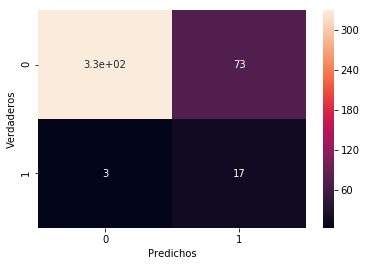

In [26]:
#Test visualization
sns.heatmap(confusion_matrix(y_test, labels_predichas), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

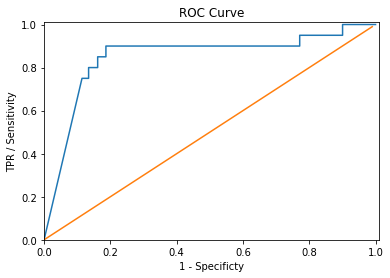

0.8493781094527363

In [30]:
from sklearn.metrics import roc_curve, auc
probs = modelo_NB.predict_proba(X_test)
probs_1= probs[:,1]
fpr_nb,tpr_nb,thr_nb = roc_curve(y_test, probs[:,1])
df = pd.DataFrame(dict(fpr_nb=fpr_nb, tpr_nb=tpr_nb))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_nb,tpr_nb)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()
auc(fpr_nb, tpr_nb)

In [31]:
#Normalization
from sklearn import preprocessing
X = preprocessing.scale(X, axis = 0)
X_test = preprocessing.scale(X_test, axis = 0)

In [32]:
#KNN Model
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Function definition for visualization, GridSearchCV could be used insted.
def scores_knn(X,y,start,stop,step):
    scores_para_df = []
    for i in range(start,stop,step):
        model = KNeighborsClassifier(n_neighbors=i)
        kf = KFold(n_splits=10, shuffle=True)      
        cv_scores = cross_val_score(model, X, y, cv=kf)
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
        scores_para_df.append(dict_row_score)
        
    df_scores = pd.DataFrame(scores_para_df)
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    return df_scores

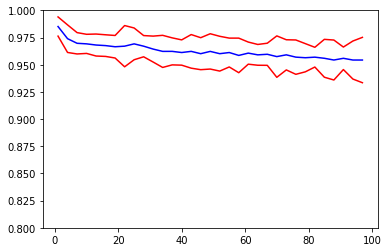

In [33]:
#KNN visualization accuracy vs neighbours
df_scores = scores_knn(X,y,1,100,3)
plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r')
plt.ylim(0.8, 1);

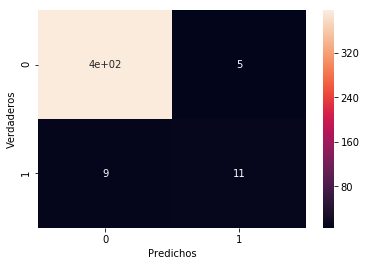

In [34]:
#KNN test predictions and visualization
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X,y)
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

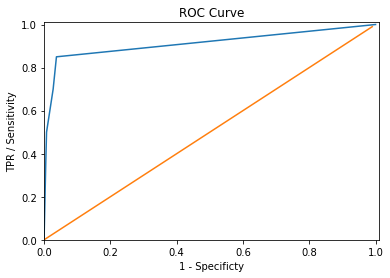

0.9120646766169155

In [35]:
from sklearn.metrics import roc_curve, auc
probs = model.predict_proba(X_test)
fpr,tpr,thr = roc_curve(y_test, probs[:,1])
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()
auc(fpr, tpr)

In [36]:
# Probs calibration
probs = model.predict_proba(X_test)
probs_1= probs[:,1]
prob = []
recall = []
pres = []
for i in np.arange(0.1, 0.9, 0.05):
    y_pred2= probs_1>i
    pres.append(precision_score(y_test, y_pred2))
    recall.append(recall_score(y_test, y_pred2))
    prob.append(i)
pknn = pd.DataFrame(data = [prob,recall,pres], index =['Prob','Rec','Pre'])
pknn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Prob,0.10000,0.15000,0.20,0.25,0.30,0.35,0.4000,0.4500,0.5000,0.5500,0.600000,0.650000,0.700000,0.750000,0.800000,0.850000
Rec,0.85000,0.85000,0.70,0.70,0.70,0.70,0.5500,0.5500,0.5500,0.5500,0.500000,0.500000,0.500000,0.500000,0.350000,0.350000
Pre,0.53125,0.53125,0.56,0.56,0.56,0.56,0.6875,0.6875,0.6875,0.6875,0.769231,0.769231,0.769231,0.769231,0.777778,0.777778


In [40]:
#Logistic Regresion, GridSearchCV could be used insted of this loop for c values.
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
scores = []
recall = []
C = []
for i in np.linspace(0.0001,0.01,20):
    reglogsklearn = LogisticRegression(fit_intercept=True,penalty='l2',C = i)
    reglogsklearn.fit(X, y)
    y_pred3 = reglogsklearn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred3))
    recall.append(recall_score(y_test, y_pred3))
    C.append(i)
a = pd.DataFrame(data = [scores,recall,C], index =['A','R','alpha'])
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
A,0.732227,0.886256,0.938389,0.950237,0.952607,0.950237,0.952607,0.954976,0.959716,0.957346,0.962085,0.966825,0.966825,0.966825,0.966825,0.969194,0.969194,0.969194,0.969194,0.969194
R,1.000000,0.900000,0.900000,0.850000,0.750000,0.700000,0.700000,0.650000,0.650000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000
alpha,0.000100,0.000621,0.001142,0.001663,0.002184,0.002705,0.003226,0.003747,0.004268,0.004789,0.005311,0.005832,0.006353,0.006874,0.007395,0.007916,0.008437,0.008958,0.009479,0.010000


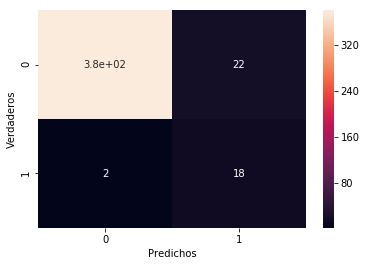

In [41]:
# Test predictions and  visualization
reglogsklearn = LogisticRegression(fit_intercept=True,penalty='l2',C = 0.0012)
reglogsklearn.fit(X, y)
y_pred3 = reglogsklearn.predict(X_test)
accuracy_score(y_test, y_pred3)
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

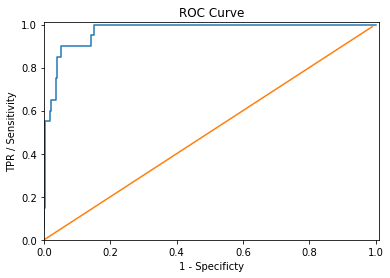

0.9722636815920398

In [42]:
from sklearn.metrics import roc_curve, auc
probs = reglogsklearn.predict_proba(X_test)
probs_1= probs[:,1]
y_pred2= probs_1>0.5
fpr_log,tpr_log,thr_log = roc_curve(y_test, probs[:,1])
df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()
auc(fpr_log, tpr_log)

In [43]:
#Probs calibration
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

probs = reglogsklearn.predict_proba(X_test)
probs_1= probs[:,1]
prob = []
recall = []
pres = []
for i in np.arange(0.1, 0.9, 0.05):
    y_pred2= probs_1>i
    pres.append(precision_score(y_test, y_pred2))
    recall.append(recall_score(y_test, y_pred2))
    prob.append(i)
prl = pd.DataFrame(data = [prob,recall,pres], index =['Prob','Rec','Pre'])
prl

C:\Users\Cone\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Prob,0.100000,0.150000,0.200000,0.250000,0.300000,0.350000,0.400000,0.450000,0.50,0.550000,0.600000,0.650000,0.700000,0.75,0.8,0.85
Rec,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000,0.90,0.750000,0.600000,0.500000,0.300000,0.20,0.1,0.00
Pre,0.047393,0.047393,0.047393,0.056657,0.085837,0.130719,0.188679,0.276923,0.45,0.483871,0.631579,0.909091,0.857143,0.80,1.0,0.00


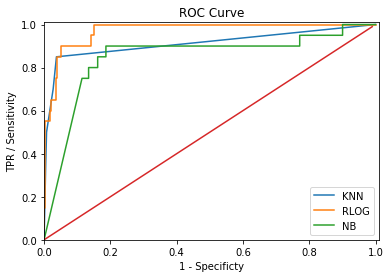

AUC-KNN:  0.9120646766169155
AUC-NB:  0.8493781094527363
AUC-RLOG:  0.9722636815920398


In [47]:
#All models ROC curves
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_nb,tpr_nb)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['KNN','RLOG','NB'])
plt.show()
print('AUC-KNN: ', auc(fpr, tpr))
print('AUC-NB: ', auc(fpr_nb, tpr_nb))
print('AUC-RLOG: ', auc(fpr_log, tpr_log))

In [ ]:
#More features could be added, like team data, age, previous participation and sentiment analysis (teams and players).
#More years could also be added and the changes in how the selection procces is done.